In [12]:
#import relevant packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

#import data as .csv file and create a dataframe using pandas
sakura_data = pd.read_csv('hirosaki_temp_cherry_bloom.csv')
sakura_df = pd.DataFrame(sakura_data)

Data Cleaning:

In [13]:
#start checking out the data and getting summary info
sakura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9131 non-null   object 
 1   temperature    9131 non-null   float64
 2   flower_status  75 non-null     object 
dtypes: float64(1), object(2)
memory usage: 214.1+ KB


In [14]:
sakura_df.head()

#there are only 3 columns and it seems like "flower_status" is missing a lot of values (because the flowers only bloom for a short period of time per year)

,date,temperature,flower_status
0,1997/1/1,2.9,NaN
1,1997/1/2,2.2,NaN
2,1997/1/3,-1.6,NaN
3,1997/1/4,0.2,NaN
4,1997/1/5,-0.4,NaN


In [15]:
#split date column into three parts
dates = sakura_df['date'].str.split('/', expand=True)
sakura_df['year'], sakura_df['month'], sakura_df['day'] = dates[0], dates[1], dates[2]

#check result
sakura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9131 non-null   object 
 1   temperature    9131 non-null   float64
 2   flower_status  75 non-null     object 
 3   year           9131 non-null   object 
 4   month          9131 non-null   object 
 5   day            9131 non-null   object 
dtypes: float64(1), object(5)
memory usage: 428.1+ KB


In [16]:
#filling in flower status column
# bloom: 0, full bloom: 1, scatter: 2, before/after/not blooming: 3
sakura_df2 = []
for x in range(len(sakura_df)):
    year = sakura_df['year'][x]
    month = sakura_df['month'][x]
    day = sakura_df['day'][x]
    temperature = sakura_df['temperature'][x]
    flower_status = sakura_df['flower_status'][x]
    if flower_status == 'bloom':
        status = 0
    elif flower_status == 'full':
        status = 1
    elif flower_status == 'scatter':
        status = 2
    else:
        status = 3
    sakura_dict = {'year':year, 'month':month, 'day':day, 'temperature':temperature, 'flower_status':status}
    sakura_df2.append(sakura_dict)

sakura_df2 = pd.DataFrame(sakura_df2)

sakura_df2.head()

,year,month,day,temperature,flower_status
0,1997,1,1,2.9,3
1,1997,1,2,2.2,3
2,1997,1,3,-1.6,3
3,1997,1,4,0.2,3
4,1997,1,5,-0.4,3


In [17]:
#count of all flower status values that actually indicate a bloom
sakura_df2[['month', 'flower_status']].value_counts()

#from this data we can see that the bloom has only occurred during the months of April and May in our dataset

month  flower_status
1      3                775
10     3                775
8      3                775
12     3                775
7      3                775
3      3                775
5      3                756
6      3                750
9      3                750
11     3                750
2      3                706
4      3                694
       0                 25
       1                 18
       2                 13
5      2                 12
       1                  7
dtype: int64

In [20]:
#creating a new dataframe to encapsulate only the blooming months
sakura_bloom_df = []
for x in range(len(sakura_df2)):
    month = sakura_df2['month'][x]
    if month == '4' or month == '5': #April or May
        sakura_dict = {'month':month, 'day':sakura_df2['day'][x], 'temperature':sakura_df2['temperature'][x], 'flower_status':sakura_df2['flower_status'][x]}
        sakura_bloom_df.append(sakura_dict)

sakura_bloom_df = pd.DataFrame(sakura_bloom_df)
sakura_bloom_df.head()


,month,day,temperature,flower_status
0,4,1,6.1,3
1,4,2,5.7,3
2,4,3,7.5,3
3,4,4,7.4,3
4,4,5,6.6,3


Data Relationship Analysis/EDA

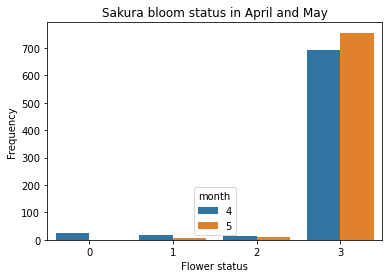

In [22]:
#visualizing what percentage of the time within the blooming months we actually see blooming flowers (to any extent)

_ = sns.countplot(data=sakura_bloom_df, x='flower_status', hue='month')
plt.xlabel('Flower status')
plt.ylabel('Frequency')
plt.title('Sakura bloom status in April and May')
plt.show()

From this figure we can clearly see that, even during the two blooming months, the actual bloom period is short.

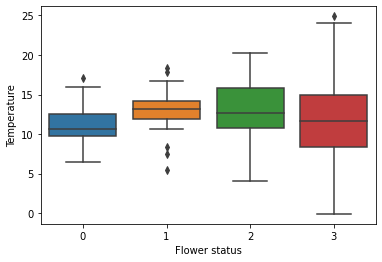

In [25]:
#visualizing the relationship between temperature and bloom status within the two blooming months

sns.boxplot(data=sakura_bloom_df,
            x='flower_status',
            y='temperature')
plt.xlabel('Flower status')
plt.ylabel('Temperature')
plt.show()

From this figure we can see that the median temperature of all 4 bloom statuses, from no flowers to full bloom, is relatively similar, clustered between roughly 10-13 degrees C. However, the range of temperatures associated with the non-bloom status is significantly wider than the blooming statuses. If we include the outliers of the boxplot for status 1, we can note that the temperature range tightens with each step towards the full bloom status.

Text(0.5, 0.98, 'Sakura Bloom Feature Correlation for Blooming Months')

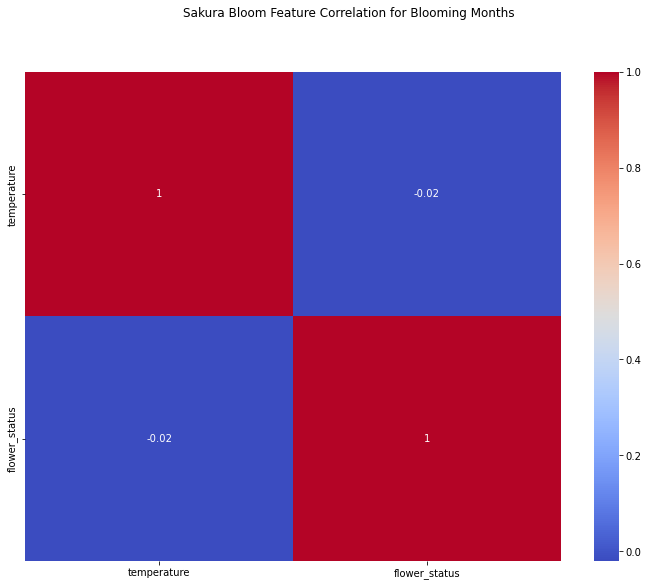

In [35]:
#creating a correlation matrix/heatmap to look at the correlation of all variables/features within the dataset

corr_mat = sakura_bloom_df.corr()
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(round(corr_mat,2), annot=True, ax=ax, cmap='coolwarm')
f.suptitle('Sakura Bloom Feature Correlation for Blooming Months')



There are only two features being analyzed here, but it is interesting (and maybe a little disheartening) to note that temperature and flower status are not very well correlated in the dataset.

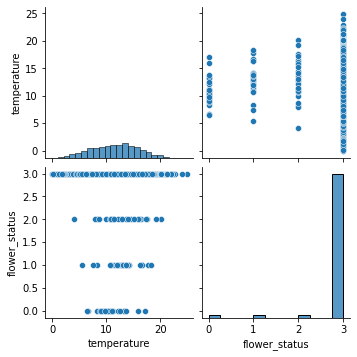

In [36]:
#another visualization of what we've seen above
sns.pairplot(sakura_bloom_df)

In [47]:
#checking out each bloom month individually to see the bloom timeline - split into 2 dataframes

april_df = sakura_bloom_df[sakura_bloom_df['month'] == '4']
may_df = sakura_bloom_df[sakura_bloom_df['month'] == '5']

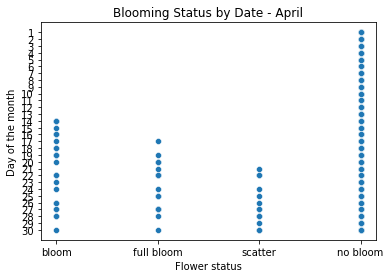

In [72]:
scatter_apr = sns.scatterplot(data=april_df, x='flower_status', y='day')

plt.xticks([0,1,2,3], ['bloom', 'full bloom', 'scatter', 'no bloom'])
plt.xlabel('Flower status')
plt.ylabel('Day of the month')
plt.title('Blooming Status by Date - April')
plt.show()

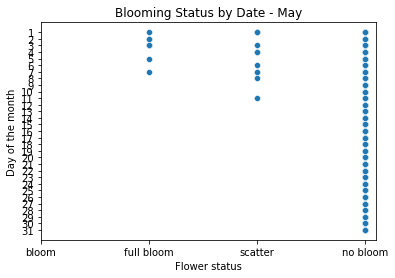

In [73]:
scatter_may = sns.scatterplot(data=may_df, x='flower_status', y='day')

plt.xticks([0,1,2,3], ['bloom', 'full bloom', 'scatter', 'no bloom'])
plt.xlabel('Flower status')
plt.ylabel('Day of the month')
plt.title('Blooming Status by Date - May')
plt.show()

These two plots indicate that we can expect the bloom to start at the earliest in mid-April, and end at the latest in early/mid-May. This will be useful information when modeling our predictions for future years.